In [2]:
import pandas as pd
import numpy as np
from string import punctuation
import re
import spacy
import matplotlib.pyplot as plt
import numpy as np
import re
from nltk.corpus import stopwords
from gensim.models import Word2Vec

In [4]:
essays = pd.read_csv('essay_dataset_new_full.csv', encoding = "utf-8")
essays.head()

,ID,EssayTopic,EssayBody,ParagraphCount,WordCount,EssayScore,CC_Score,LR_Score,GRA_Score,TA_Score
0,1,Increasing the price of petrol is the best way...,"Over the last century, our cities faced unprec...",4,350,6.0,5.5,5.5,6.5,6.5
1,2,Fatherhood ought to be emphasized as much as m...,"According to some people, the role of a father...",4,419,6.0,5.5,5.5,6.5,7.0
2,3,Best way to reduce the number of crime among y...,"Thesedays, number of crime commit by the young...",3,197,5.0,5.5,5.0,6.5,5.0
3,4,Some people believe that it is good to share a...,Some people believe that sharing details of re...,4,281,6.0,6.5,5.5,6.5,6.0
4,5,Some people believe that teaching children at ...,People these days have contradictory opinion r...,12,410,5.5,5.5,5.0,5.5,5.0


In [5]:
essays.shape

(24254, 10)

In [6]:
essays['EssayTopic'] = essays['EssayTopic'].apply(lambda x: x.encode('ascii', 'ignore').\
                                          strip().decode())

essays['EssayBody'] = essays['EssayBody'].apply(lambda x: x.encode('ascii', 'ignore').\
                                          strip().decode())


In [7]:
isnull = essays.isnull().sum()
dtype = essays.dtypes
print('Number of null values in each column:\n \n{}\n'.format(isnull))
print('Data Type of each column:\n \n{} \n'.format(dtype))

Number of null values in each column:
 
ID                0
EssayTopic        0
EssayBody         0
ParagraphCount    0
WordCount         0
EssayScore        0
CC_Score          0
LR_Score          0
GRA_Score         0
TA_Score          0
dtype: int64

Data Type of each column:
 
ID                  int64
EssayTopic         object
EssayBody          object
ParagraphCount      int64
WordCount           int64
EssayScore        float64
CC_Score          float64
LR_Score          float64
GRA_Score         float64
TA_Score          float64
dtype: object 



In [8]:
nlp = spacy.load("en_core_web_sm")
nlp.add_pipe("merge_entities")
def ner_tag(text):
    doc = nlp(text)
    new_text = (" ".join([t.text if not t.ent_type_ else "@"+t.ent_type_ for t in doc])).strip()
    return new_text

In [3]:
essays['EssayBody'] = essays['EssayBody'].map(ner_tag)
essays.to_csv('essay_dataset_with_ner.csv')  

NameError: name 'essays' is not defined

In [4]:
clean_essays = pd.read_csv('essay_dataset_with_ner.csv')
clean_essays.head()

,ID,EssayBody,ParagraphCount,WordCount,EssayScore
0,32113,A balanced professional and personal life is t...,4,290,6.0
1,22939,A better climate is required for the good life...,4,316,7.5
2,20092,A big boom in the automobile industry has laun...,4,315,7.0
3,24691,A big deal of people agree that social network...,5,287,7.5
4,30157,A big number of people in our country still be...,4,300,8.5


In [ ]:
def clean_topic(text):
    text = text.lower()  # Lowercase text
    text = re.sub(f"[{re.escape(punctuation)}]", "", text)  # Remove punctuation
    text = " ".join(text.split())  # Remove extra spaces, tabs, and new lines
    return text


<AxesSubplot:>

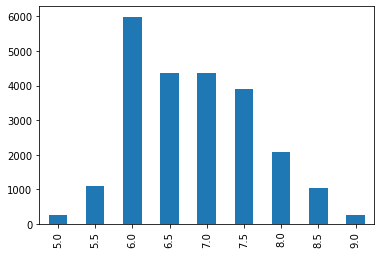

In [5]:
clean_essays['EssayScore'].value_counts().sort_index().plot(kind='bar')

In [ ]:
essays['EssayTopic'] = essays['EssayTopic'].map(clean_topic)

In [ ]:
"""def convert_to_category(score):
    if score == 5.0:
        return str(0)
    elif score == 5.5:
        return str(1)
    elif score == 6.0:
        return str(1)
    elif score == 6.5:
        return str(1)
    elif score == 7.0:
        return str(1)
    elif score == 7.5:
        return str(1)
    elif score == 8.5:
        return str(1)
    else:
        return str(9)"""

In [6]:
clean_essays['EssayScore'] = clean_essays.EssayScore.astype("category").cat.codes
clean_essays.head()

,ID,EssayBody,ParagraphCount,WordCount,EssayScore
0,32113,A balanced professional and personal life is t...,4,290,2
1,22939,A better climate is required for the good life...,4,316,5
2,20092,A big boom in the automobile industry has laun...,4,315,4
3,24691,A big deal of people agree that social network...,5,287,5
4,30157,A big number of people in our country still be...,4,300,7


In [7]:
clean_essays.dtypes

ID                 int64
EssayBody         object
ParagraphCount     int64
WordCount          int64
EssayScore          int8
dtype: object

_______

_________

In [8]:
X = clean_essays[['EssayBody']].copy()
y = clean_essays[['EssayScore']].copy()

In [9]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/ekrembakay/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ekrembakay/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [10]:
def essay_to_wordlist(sentence):
    """Remove the tagged labels and word tokenize the sentence."""
    words = nltk.word_tokenize(sentence)
    return words

def essay_to_sentences(essay):
    """Sentence tokenize the essay and call essay_to_wordlist() for word tokenization."""
    raw_sentences = nltk.sent_tokenize(essay.strip())
    sentences = []
    for raw_sentence in raw_sentences:
        if len(raw_sentence) > 0:
            sentences.append(essay_to_wordlist(raw_sentence))
    return sentences

In [11]:


def makeFeatureVec(words, model, num_features):
    """Make Feature Vector from the words list of an Essay."""
    featureVec = np.zeros((num_features,),dtype="float32")
    num_words = 0.
    index2word_set = set(model.wv.index_to_key)
    for word in words:
        if word in index2word_set:
            num_words += 1
            featureVec = np.add(featureVec,model.wv[word])        
    featureVec = np.divide(featureVec,num_words)
    return featureVec

def getAvgFeatureVecs(essays, model, num_features):
    """Main function to generate the word vectors for word2vec model."""
    counter = 0
    essayFeatureVecs = np.zeros((len(essays),num_features),dtype="float32")
    for essay in essays:
        essayFeatureVecs[counter] = makeFeatureVec(essay, model, num_features)
        counter = counter + 1
    return essayFeatureVecs

In [12]:
from keras.layers import Embedding, LSTM, Dense, Dropout, Lambda, Flatten
from keras.models import Sequential, load_model, model_from_config
import keras.backend as K

def get_model():
    """Define the model."""
    model = Sequential()
    model.add(LSTM(300, dropout=0.4, recurrent_dropout=0.4, input_shape=[1, 300], return_sequences=True))
    model.add(LSTM(64, recurrent_dropout=0.4))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='relu'))

    model.compile(loss='mean_squared_error', optimizer='rmsprop', metrics=['mae'])
    model.summary()

    return model

In [ ]:
from constants import GLOVE_DIR
from keras.layers import Embedding, LSTM, Dense, Dropout, Lambda, Flatten
from keras.models import Sequential
import keras.backend as K
from utils import tokenizer, load_embedding_matrix

def get_model(embedding_dimension, essay_length):
    vocabulary_size = len(tokenizer.word_index) + 1
    embedding_matrix = load_embedding_matrix(glove_directory=GLOVE_DIR, embedding_dimension=embedding_dimension)

    model = Sequential()

    model.add(Embedding(vocabulary_size, embedding_dimension, weights=[embedding_matrix], input_length=essay_length, trainable=False, mask_zero=False))
    model.add(LSTM(128, dropout=0.4, recurrent_dropout=0.4))
    model.add(Dropout(0.5))
    model.add(Lambda(lambda x: K.mean(x, axis=1, keepdims=True)))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(loss='mean_squared_error', optimizer='rmsprop', metrics=['mae'])
    model.summary()

    return model

In [13]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import cohen_kappa_score

cv = KFold(5, shuffle=True)
results = []
y_pred_list = []

count = 1
for traincv, testcv in cv.split(X):
    print("\n--------Fold {}--------\n".format(count))
    X_test, X_train, y_test, y_train = X.iloc[testcv], X.iloc[traincv], y.iloc[testcv], y.iloc[traincv]
    
    train_essays = X_train['EssayBody']
    test_essays = X_test['EssayBody']
    
    sentences = []
    
    for essay in train_essays:
            # Obtaining all sentences from the training essays.
            sentences += essay_to_sentences(essay, remove_stopwords = True)
            
    # Initializing variables for word2vec model.
    num_features = 300 
    min_word_count = 40
    num_workers = 4
    context = 10
    downsampling = 1e-3

    print("Training Word2Vec Model...")
    model = Word2Vec(sentences, workers=num_workers, vector_size=num_features, min_count = min_word_count, window = context, sample = downsampling)

    model.init_sims(replace=True)
    model.wv.save_word2vec_format('word2vecmodel.bin', binary=True)

    clean_train_essays = []
    
    # Generate training and testing data word vectors.
    for essay_v in train_essays:
        clean_train_essays.append(essay_to_wordlist(essay_v, remove_stopwords=True))
    trainDataVecs = getAvgFeatureVecs(clean_train_essays, model, num_features)
    
    clean_test_essays = []
    for essay_v in test_essays:
        clean_test_essays.append(essay_to_wordlist( essay_v, remove_stopwords=True ))
    testDataVecs = getAvgFeatureVecs(clean_test_essays, model, num_features )
    
    trainDataVecs = np.array(trainDataVecs)
    testDataVecs = np.array(testDataVecs)
    # Reshaping train and test vectors to 3 dimensions. (1 represnts one timestep)
    trainDataVecs = np.reshape(trainDataVecs, (trainDataVecs.shape[0], 1, trainDataVecs.shape[1]))
    testDataVecs = np.reshape(testDataVecs, (testDataVecs.shape[0], 1, testDataVecs.shape[1]))
    
    lstm_model = get_model()
    lstm_model.fit(trainDataVecs, y_train, batch_size=64, epochs=50)
    #lstm_model.load_weights('./model_weights/final_lstm.h5')
    y_pred = lstm_model.predict(testDataVecs)
    
    # Round y_pred to the nearest integer.
    y_pred2 = np.around(y_pred)
    y_test = np.around(y_test)
    
    # Save any one of the 8 models.
    if count == 5:
         lstm_model.save('./model_weights/final_lstm.h5')
    
    # Evaluate the model on the evaluation metric. "Quadratic mean averaged Kappa"
    result = cohen_kappa_score(y_test.values,y_pred2,weights='quadratic')
    print("Kappa Score: {}".format(result))
    results.append(result)
    
    count += 1
    break


--------Fold 1--------



TypeError: essay_to_sentences() got an unexpected keyword argument 'remove_stopwords'

In [ ]:
y_pred.shape

In [ ]:
y_pred

In [ ]:
y_test

In [ ]:
y_test = np.around(y_test)

In [ ]:
y_pred = np.around(y_pred - 1)


In [ ]:
y_test2 = y_test.values
y_test2 = np.around(y_test2, decimals = 1)
y_test2